In [64]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv("summer.csv")

In [66]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


#1. In how many cities Summer Olympics is held so far?

In [67]:
a=df['City'].unique()
print(a)
print("summer olympics held in:- ", len(a)," cities")

['Athens' 'Paris' 'St Louis' 'London' 'Stockholm' 'Antwerp' 'Amsterdam'
 'Los Angeles' 'Berlin' 'Helsinki' 'Melbourne / Stockholm' 'Rome' 'Tokyo'
 'Mexico' 'Munich' 'Montreal' 'Moscow' 'Seoul' 'Barcelona' 'Atlanta'
 'Sydney' 'Beijing']
summer olympics held in:-  22  cities


#2. Which sport is having most number of Gold Medals so far? (Top 5)

In [68]:
df[df['Medal']=='Gold']

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold


In [69]:
df=df[df['Medal']=='Gold']
data=[]
for sport in df['Sport'].unique():
    data.append([sport, len(df[df['Sport']==sport])])

data=pd.DataFrame(data, columns=['Sport' , 'Gold'])
data.sort_values(by='Gold', ascending=False).head()


,Sport,Gold
0,Aquatics,1421
1,Athletics,1215
17,Rowing,890
4,Gymnastics,820
3,Fencing,552


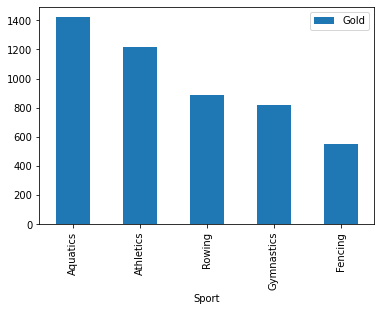

In [70]:
data=pd.DataFrame(data, columns=['Sport' , 'Gold'])
data= data.sort_values(by='Gold', ascending=False).head()
data.plot(x = 'Sport', y = 'Gold' , kind = 'bar' )

#3. Which sport is having most number of medals so far? (Top 5)

In [71]:
df = pd.read_csv("summer.csv")
data = []
for Medal in df['Sport'].unique():
    data.append([Medal , len(df[df['Sport']==Medal])])

data=pd.DataFrame(data, columns=['Sport' , 'Medal'])
data.sort_values(by='Medal', ascending=False).head()

,Sport,Medal
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


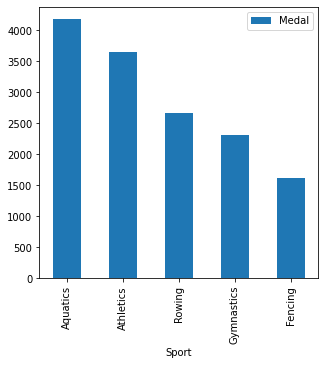

In [72]:
data=pd.DataFrame(data, columns=['Sport' , 'Medal'])
data=data.sort_values(by='Medal', ascending=False).head()
data.plot(x = 'Sport', y = 'Medal' , kind = 'bar',figsize=(5,5) )

#4. Which player has won most number of medals? (Top 5)

In [73]:
df = pd.read_csv("summer.csv")
data = []
for Medal in df['Athlete'].unique():
    data.append([Medal , len(df[df['Athlete']==Medal])])
data=pd.DataFrame(data, columns=['Athlete' , 'Medals'])
data.sort_values(by='Medals', ascending=False).head()

,Athlete,Medals
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


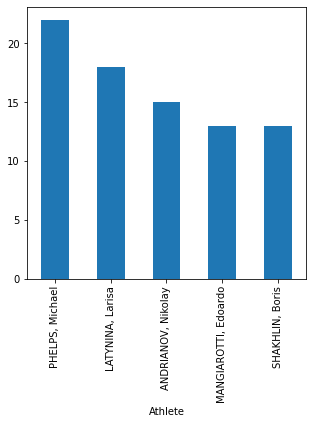

In [74]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(5,5))


#5. Which player has won most number Gold Medals of medals? (Top 5)

In [75]:
df=df[df['Medal']=='Gold']

data = []
for Medal in df['Athlete'].unique():
    data.append([Medal , len(df[df['Athlete']==Medal])])
data=pd.DataFrame(data, columns=['Athlete' , 'Freq'])
data.sort_values(by='Freq', ascending=False).head()


,Athlete,Freq
6851,"PHELPS, Michael",18
3320,"SPITZ, Mark",9
2714,"LATYNINA, Larisa",9
4630,"LEWIS, Carl",9
907,"NURMI, Paavo",9


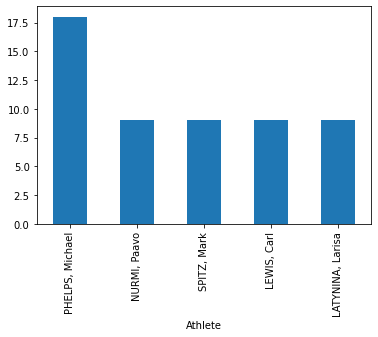

In [76]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head(5).plot.bar()

#6. In which year India won first Gold Medal in Summer Olympics?

In [77]:
df = pd.read_csv("summer.csv")
df=df[df['Country']=='IND']
df=df[df['Medal']=='Gold']

data=[]
for year in df['Year'].unique():
    data.append([year, len(df[df['Year']==year])])

data=pd.DataFrame(data, columns=['Year' , 'Gold'])
data.sort_values(by='Year', ascending=True).head(1)

,Year,Gold
0,1928,15


#7. Which event is most popular in terms on number of players? (Top 5)

In [78]:
df = pd.read_csv("summer.csv")
data=[]
for event in df['Event'].unique():
    data.append([event, len(df[df['Event']==event])])

data=pd.DataFrame(data, columns=['Event' , 'Players'])
data.sort_values(by='Players', ascending=False).head()


,Event,Players
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


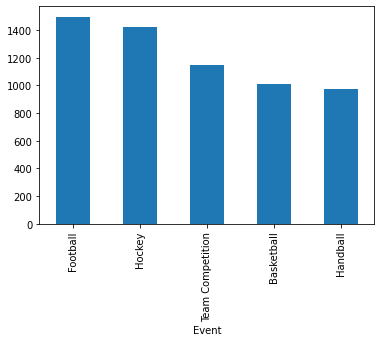

In [79]:
df.groupby("Event").count()['Athlete'].sort_values(ascending=False).head(5).plot.bar()

#8. Which sport is having most female Gold Medalists? (Top 5)

In [80]:
df = pd.read_csv("summer.csv")
df=df[df['Gender']=='Women']
df=df[df['Medal']=='Gold']

data=[]
for sport in df['Sport'].unique():
    data.append([sport, len(df[df['Sport']==sport])])

data=pd.DataFrame(data, columns=['Sport' , 'Gold'])
data.sort_values(by='Gold', ascending=False).head()

,Sport,Gold
4,Aquatics,589
7,Athletics,389
8,Gymnastics,268
14,Rowing,217
11,Volleyball,166


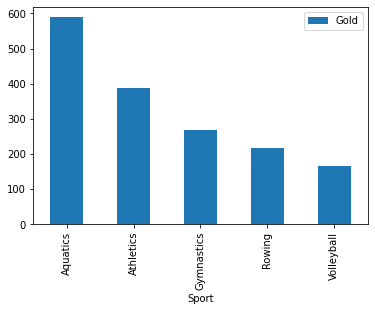

In [81]:
data=pd.DataFrame(data, columns=['Sport' , 'Gold'])
data.sort_values(by='Gold', ascending=False).head().plot(x='Sport', y='Gold', kind='bar')